# Eksperimen Machine Learning - Telco Customer Churn

Notebook ini berisi eksperimen untuk membangun model prediksi churn pelanggan telekomunikasi. Dataset yang digunakan adalah Telco Customer Churn yang berisi informasi pelanggan beserta status churn mereka.

# **1. Perkenalan Dataset**

Dataset Telco Customer Churn berisi data pelanggan perusahaan telekomunikasi dengan berbagai fitur seperti:
- Informasi demografis (gender, senior citizen, partner, dependents)
- Layanan yang digunakan (phone, internet, streaming, dll)
- Informasi akun (contract type, payment method, charges)
- Target: Churn (Yes/No) - apakah pelanggan berhenti berlangganan atau tidak

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Load dataset dari file CSV. Dataset ini udah ada di folder parent, jadi kita pake path relatif buat aksesnya.

In [2]:
df = pd.read_csv('../telco_churn_raw.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cek dimensi dan info dasar dari dataset.

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **4. Exploratory Data Analysis (EDA)**

Di bagian ini kita bakal eksplorasi data lebih dalam untuk memahami karakteristik dataset sebelum preprocessing.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Cek Missing Values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cek Duplicate Data

In [7]:
df.duplicated().sum()

np.int64(0)

### Distribusi Target Variable (Churn)

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

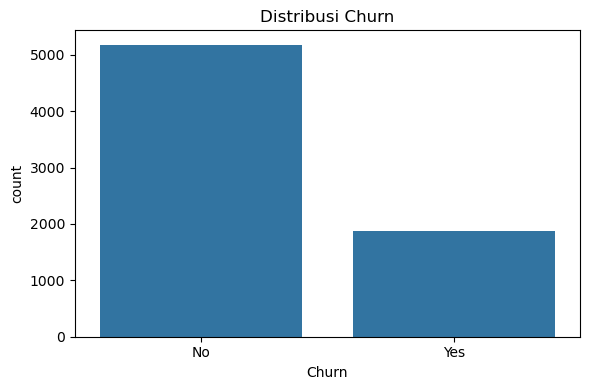

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Churn')
plt.tight_layout()
plt.show()

### Distribusi Fitur Numerik

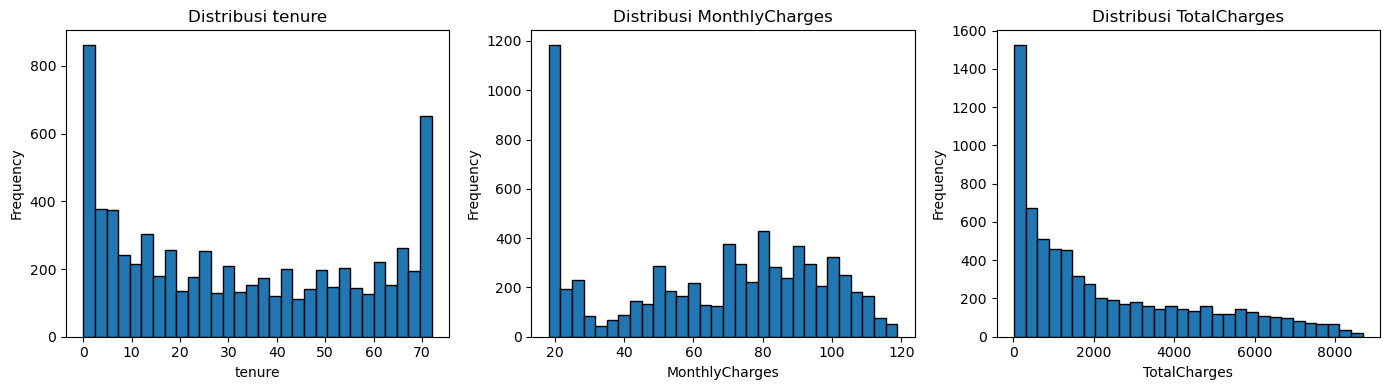

In [10]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Korelasi antar Fitur Numerik

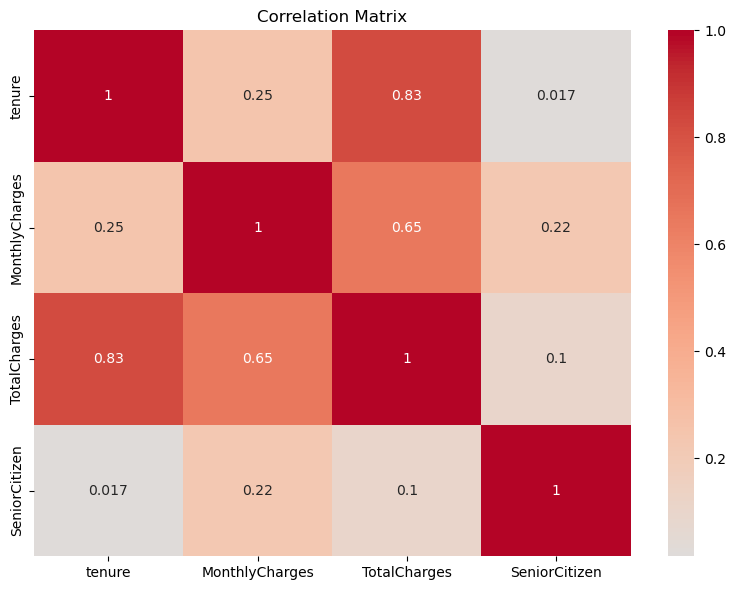

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Churn berdasarkan Contract Type

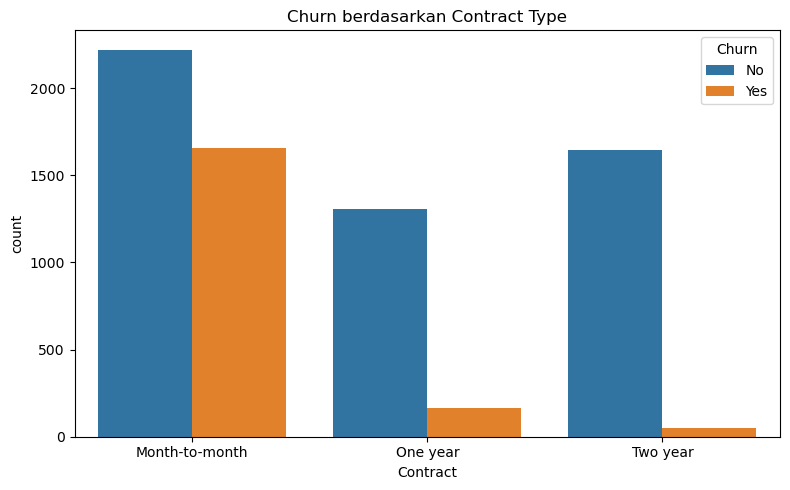

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn berdasarkan Contract Type')
plt.tight_layout()
plt.show()

### Churn berdasarkan Internet Service

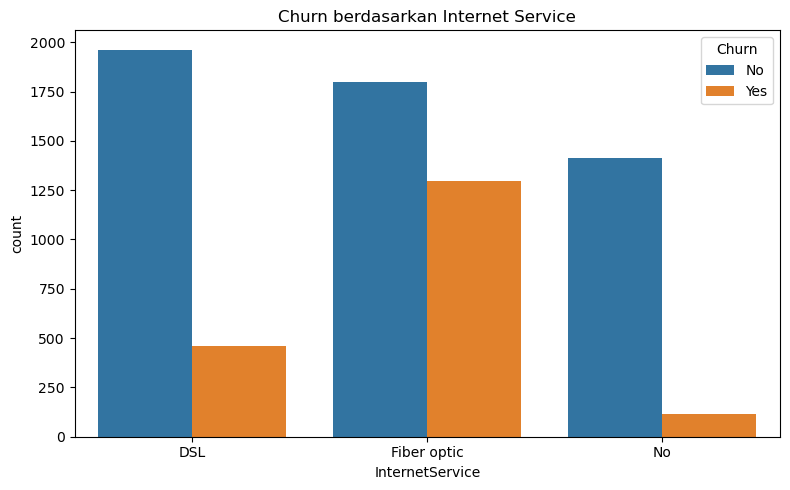

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn berdasarkan Internet Service')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Di bagian ini kita bakal bersihin data dan transform supaya siap dipakai untuk training model.

### Drop customerID

Kolom customerID ini cuma identifier doang, ga berguna buat model.

In [14]:
df_clean = df.drop('customerID', axis=1)
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handle Missing Values di TotalCharges

TotalCharges ada yang kosong (string kosong), kita convert ke numeric dan handle missing value-nya.

In [15]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)
df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Encoding Categorical Variables

Convert kolom categorical ke numerical pake Label Encoding.

In [16]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [17]:
le = LabelEncoder()
df_encoded = df_clean.copy()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Feature Scaling

Standarisasi fitur numerik supaya punya skala yang sama.

In [18]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


### Split Data (Features dan Target)

In [19]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Cek ukuran data train dan test.

In [20]:
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

### Simpan Data yang Sudah Dipreprocess

Simpan dataset yang udah bersih ke file CSV buat dipake di tahap modelling nanti.

In [21]:
train_data = X_train.copy()
train_data['Churn'] = y_train.values

test_data = X_test.copy()
test_data['Churn'] = y_test.values

train_data.to_csv('telco_churn_train.csv', index=False)
test_data.to_csv('telco_churn_test.csv', index=False)

df_encoded.to_csv('telco_churn_preprocessed.csv', index=False)

Notebook eksperimen selesai. Data yang sudah dipreprocess tersimpan di folder preprocessing dan siap digunakan untuk tahap modelling.